# Poisson 分佈

In [2]:
import math
import matplotlib.pyplot as plt

### #PS.lamb : lambda 因為與某函數名字相同，故無法使用

In [9]:
class Poisson:
    def __init__(self, n=0, p=0, lamb=0):
        self.n = n
        self.p = p
        if (self.n == 0) and (self.p == 0):    # 可直接用 lamb 做引數(但不能繪圖)
            self.lamb = lamb
        else:
            self.lamb = n * p           
        self.prob_0 = math.exp(-self.lamb)     # P(x=0)



    # 繪出所有 P(X=i) 分佈的折線圖 
    def draw_dis(self, graph = "line_graph" ):

        if (self.n == 0) or (self.p == 0):                      # 如果初始引數為 lamb，則無法繪圖
            print("the input is lamb, can't draw graph!!")
        else:
            prob_list = []
            prob_list.append(self.prob_0)

            # 計算 X = 1-n 所有的P(X)
            for i in range( 1, self.n + 1 ):
                prob_i = self.Prob( "=", i )
                prob_list.append( prob_i )

            if graph == "line_graph":
                # 繪出折線圖
                plt.figure(figsize=(11,5))
                plt.title("Poisson", fontsize=30)
                plt.scatter( range( self.n + 1 ), prob_list, color='red' , s=80 )
                plt.plot( range( self.n + 1 ), prob_list , linewidth=3, color='red' )
                # plt.xticks( range(0, self.n+1) )
                plt.xlabel("X=i", fontsize=22)
                plt.ylabel("P(X=i)", fontsize=22)
                plt.show()

            elif graph == "bar_graph":
                # 繪出長條圖
                plt.figure(figsize=(11,5))
                plt.title("Poisson", fontsize=30)
                plt.bar( range( self.n + 1 ), prob_list, color='green' )
                plt.xticks( range(0, self.n+1) )
                plt.xlabel("X=i", fontsize=22)
                plt.ylabel("P(X=i)", fontsize=22)
                plt.show()



    # 利用遞迴計算出指定的 P(X=i)
    def Prob(self, state, i):
        # 給定初值 P(x=0)
        prob_i = self.prob_0
        
        # P( X == i )
        if state == "=":
            if i == 0 :                       # 如果 i=0
                return round( prob_i, 4)    # 輸出小數點後4位置 
            else:                           # i != 0
                # 計算遞迴
                for j in range(i):
                    prob_i = prob_i * ( self.lamb / ( j + 1 ) )
                return round( prob_i, 4)    
        
        # P( X < i )
        elif state == "<":
            if i == 0:
                return 0
            else:
                prob_sum = prob_i
                for k in range( 1, i ):
                    for j in range(k):
                        prob_i = prob_i * ( self.lamb / ( j + 1 ) )
                    prob_sum = prob_sum + prob_i    # 加總 prob_i
                    prob_i = self.prob_0            # 重設 prob_i
                return round( prob_sum, 4)

        # P( X <= i )
        elif state == "<=":
            if i == 0:
                return prob_i
            else:
                prob_sum = prob_i
                for k in range( 1, i+1 ):
                    for j in range(k):
                        prob_i = prob_i * ( self.lamb / ( j + 1 ) )
                    prob_sum = prob_sum + prob_i
                    prob_i = self.prob_0
                return round( prob_sum, 4)

        # P( X > i )
        elif state == ">":
            if i == 0:
                return 1 - prob_i
            else:
                prob_sum = prob_i
                for k in range( 1, i+1 ):
                    for j in range(k):
                        prob_i = prob_i * ( self.lamb / ( j + 1 ) )
                    prob_sum = prob_sum + prob_i
                    prob_i = self.prob_0

                prob_sum = 1 - prob_sum             # P(X > i) = (1 - P(X <= i) )
                return round( prob_sum, 4)

        # P( X >= i )
        elif state == ">=":
            if i == 0:
                return 1
            else:
                prob_sum = prob_i
                for k in range( 1, i ):
                    for j in range(k):
                        prob_i = prob_i * ( self.lamb / ( j + 1 ) )
                    prob_sum = prob_sum + prob_i
                    prob_i = self.prob_0

                prob_sum = 1 - prob_sum             # P(X >= i) = (1 - P(X < i) )
                return round( prob_sum, 4)


# 類別使用 :
### 1.初始化 Poisson 類別 : Poisson( n, p, lambda=0 )
### n為實驗進行次數，p為每次成功機率，lambda 為(n*p)通常不用輸入，除非沒n,p只有lambda
##


##
# 函數使用 :
### 1--類別變數.Prob( state, i ) : 可得到 P(x state i) 值。 [state 為X要大於or小於,等於i]
###
### 2--類別變數.draw_dis(graph) : 可以繪出所有x=i和其p(x=i)關係圖。[graph 為要繪製的圖，default=折線圖, "bar_graph"為長條圖]

## 例題實踐 (Ex7a)

 P(X <= 2) = 0.7358


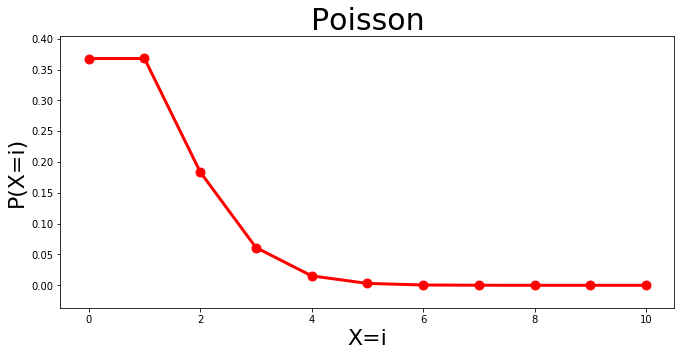

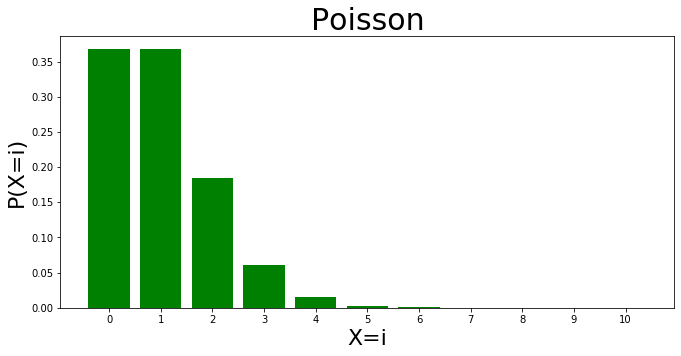

In [10]:
data1 = Poisson( 10, 0.1 )    # n=10、p=0.1
p = data1.Prob( "<=", 1)      # P( x <= 1 )
print( f" P(X <= 2) = {p}" )

# x=i & P(x=i) 圖
data1.draw_dis()
data1.draw_dis(graph="bar_graph")

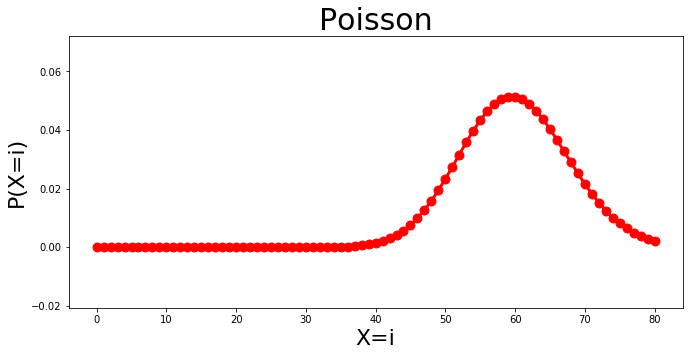

0.1077


In [17]:
data = Poisson( n=80, p=0.75 )
data.draw_dis()
print(data.Prob("<=",i=50))

##
## 例題實踐 (Ex7b)

In [6]:
data2 = Poisson(lamb=3.2)  # 只給lambda值
data2.draw_dis()
p = data2.Prob("<=",2)     # P( x <= 2 )
print( f" P(X <= 2) = {p}" )

the input is lamb, can't draw graph!!
 P(X <= 2) = 0.3799
